In [31]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import collections

In [32]:
data=pd.read_csv("C:/Users/hantao/Desktop/data analysis project/Springboard_Project/Capstone1_Project/data.csv")

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 41 columns):
Unnamed: 0                        119390 non-null int64
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119390 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           119390 non-null object
market_segment                    119390 no

In [34]:
data.head()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,reservation_status_date,Date_time,Maximum_Temperature,Minimum _Temperature,Average_Temperature,Heat_Index,Precipitation(inches),Wind_Speed,Relative_Humidity,Conditions
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,2015-07-01,7/1/2015,74.4,63.3,67.6,68.379723,0.1,14.4,83.56,"Rain, Clear"
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,2015-07-01,7/1/2015,74.4,63.3,67.6,68.379723,0.1,14.4,83.56,"Rain, Clear"
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,2015-07-02,7/1/2015,74.4,63.3,67.6,68.379723,0.1,14.4,83.56,"Rain, Clear"
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,2015-07-02,7/1/2015,74.4,63.3,67.6,68.379723,0.1,14.4,83.56,"Rain, Clear"
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,2015-07-03,7/1/2015,74.4,63.3,67.6,68.379723,0.1,14.4,83.56,"Rain, Clear"


In [35]:
data['Date_time']=pd.to_datetime(data['Date_time'])
a=data.groupby(data['Date_time'])
a.first()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,reservation_status,reservation_status_date,Maximum_Temperature,Minimum _Temperature,Average_Temperature,Heat_Index,Precipitation(inches),Wind_Speed,Relative_Humidity,Conditions
Date_time,,,,,,,,,,,,,,,,,,,,,
2015-07-01,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,Check-Out,2015-07-01,74.4,63.3,67.6,68.379723,0.1,14.4,83.56,"Rain, Clear"
2015-07-02,122,Resort Hotel,0,69,2015,July,27,2,2,4,...,Check-Out,2015-07-08,77.5,60.7,68.3,73.900927,0.0,13.2,69.33,Clear
2015-07-03,215,Resort Hotel,0,10,2015,July,27,3,0,2,...,Check-Out,2015-07-05,78.7,60.9,69.2,75.360553,0.0,13.7,63.13,Clear
2015-07-04,271,Resort Hotel,0,4,2015,July,27,4,2,1,...,Check-Out,2015-07-07,84.2,65.9,72.7,86.000000,0.0,13.4,76.56,Clear
2015-07-05,359,Resort Hotel,0,9,2015,July,28,5,1,0,...,Check-Out,2015-07-06,81.2,63.9,70.7,80.000000,0.0,14.7,58.79,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-27,117937,Resort Hotel,1,73,2017,August,35,27,1,0,...,Canceled,2017-06-26,76.5,64.6,69.9,71.499566,0.0,16.0,78.02,Clear
2017-08-28,118111,Resort Hotel,1,56,2017,August,35,28,1,1,...,Canceled,2017-07-17,72.4,61.5,67.1,68.922930,0.5,9.8,82.19,"Rain, Partially cloudy"
2017-08-29,118322,Resort Hotel,1,205,2017,August,35,29,0,2,...,Canceled,2017-08-15,72.1,62.8,67.2,67.779187,0.0,13.2,84.54,Clear


In [36]:
counts=a['is_canceled'].value_counts()
counts

Date_time   is_canceled
2015-07-01  0              103
            1               19
2015-07-02  1               57
            0               36
2015-07-03  0               37
                          ... 
2017-08-29  1               44
2017-08-30  0               62
            1               27
2017-08-31  0               89
            1               45
Name: is_canceled, Length: 1586, dtype: int64

In [37]:
unstack=counts.unstack()
unstack

is_canceled,0,1
Date_time,,
2015-07-01,103,19
2015-07-02,36,57
2015-07-03,37,19
2015-07-04,45,43
2015-07-05,37,16
...,...,...
2017-08-27,125,49
2017-08-28,147,64
2017-08-29,81,44


In [38]:
list=[]
for i in range(793):
    sum=unstack[0][i]+unstack[1][i]
    percent=(unstack[1][i]/sum)*100
    list.append(percent)
list

[15.573770491803279,
 61.29032258064516,
 33.92857142857143,
 48.86363636363637,
 30.18867924528302,
 45.33333333333333,
 46.2962962962963,
 34.78260869565217,
 63.74999999999999,
 17.647058823529413,
 40.77669902912621,
 41.269841269841265,
 53.57142857142857,
 31.428571428571427,
 47.05882352941176,
 60.19417475728155,
 29.80132450331126,
 50.32258064516129,
 33.33333333333333,
 57.599999999999994,
 61.97183098591549,
 66.14173228346458,
 47.199999999999996,
 23.4375,
 50.49019607843137,
 31.914893617021278,
 57.05882352941176,
 17.647058823529413,
 32.0,
 58.58585858585859,
 26.08695652173913,
 45.45454545454545,
 14.000000000000002,
 60.10928961748634,
 23.52941176470588,
 41.55844155844156,
 36.0,
 42.10526315789473,
 48.54368932038835,
 16.470588235294116,
 38.164251207729464,
 23.931623931623932,
 37.59398496240601,
 50.467289719626166,
 63.829787234042556,
 46.8421052631579,
 24.489795918367346,
 42.5531914893617,
 27.659574468085108,
 12.121212121212121,
 45.45454545454545,
 1

In [39]:
b=pd.DataFrame(a['Date_time'])
b['percent']=list
b.pop(1)
b

,0,percent
0,2015-07-01,15.573770
1,2015-07-02,61.290323
2,2015-07-03,33.928571
3,2015-07-04,48.863636
4,2015-07-05,30.188679
...,...,...
788,2017-08-27,28.160920
789,2017-08-28,30.331754
790,2017-08-29,35.200000
791,2017-08-30,30.337079


In [47]:
b['Date_time']=b[0]
c=pd.merge(data,b)

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,Maximum_Temperature,Minimum _Temperature,Average_Temperature,Heat_Index,Precipitation(inches),Wind_Speed,Relative_Humidity,Conditions,0,percent
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,74.4,63.3,67.6,68.379723,0.1,14.4,83.56,"Rain, Clear",2015-07-01,15.573770
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,74.4,63.3,67.6,68.379723,0.1,14.4,83.56,"Rain, Clear",2015-07-01,15.573770
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,74.4,63.3,67.6,68.379723,0.1,14.4,83.56,"Rain, Clear",2015-07-01,15.573770
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,74.4,63.3,67.6,68.379723,0.1,14.4,83.56,"Rain, Clear",2015-07-01,15.573770
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,74.4,63.3,67.6,68.379723,0.1,14.4,83.56,"Rain, Clear",2015-07-01,15.573770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,119385,City Hotel,0,53,2016,November,47,13,2,4,...,67.4,56.7,62.0,70.922721,0.1,11.2,80.99,"Rain, Clear",2016-11-13,21.428571
119386,119386,City Hotel,0,118,2016,November,47,13,2,4,...,67.4,56.7,62.0,70.922721,0.1,11.2,80.99,"Rain, Clear",2016-11-13,21.428571
119387,119387,City Hotel,0,12,2016,November,47,13,2,5,...,67.4,56.7,62.0,70.922721,0.1,11.2,80.99,"Rain, Clear",2016-11-13,21.428571
119388,119388,City Hotel,0,39,2016,November,47,13,2,5,...,67.4,56.7,62.0,70.922721,0.1,11.2,80.99,"Rain, Clear",2016-11-13,21.428571


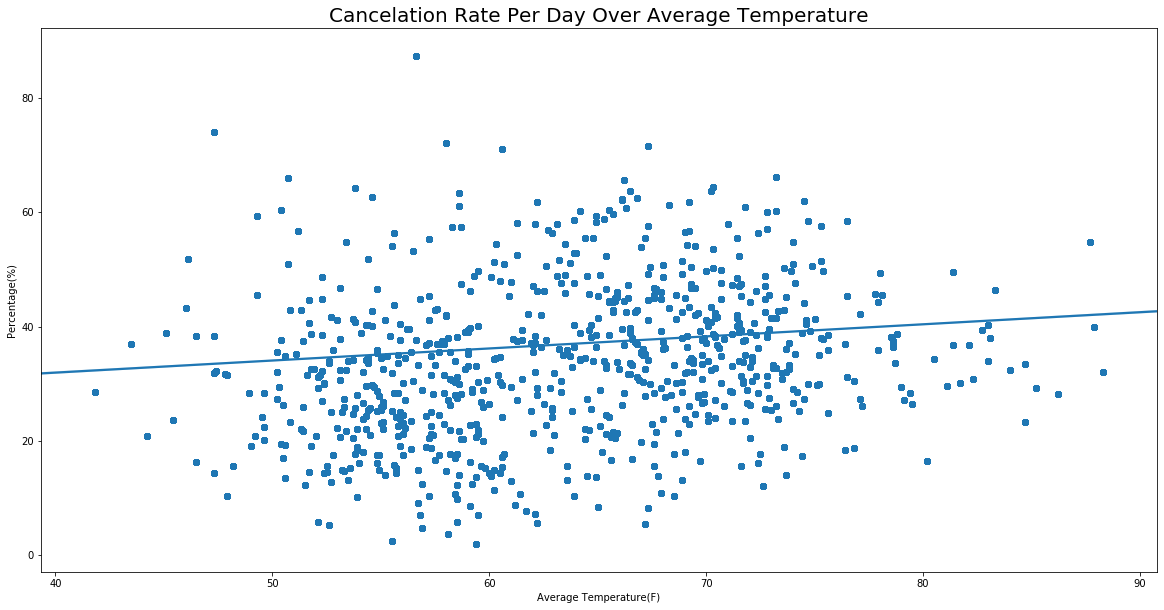

In [189]:
figure(figsize=(20,10))
plot=sns.scatterplot(x='Average_Temperature',y='percent',data=c)
sns.regplot(x='Average_Temperature',y='percent',data=c)
plt.xlabel('Average Temperature(F)')
plt.ylabel('Percentage(%)')
plt.title('Cancelation Rate Per Day Over Average Temperature',fontsize=20)
plt.show(plot)

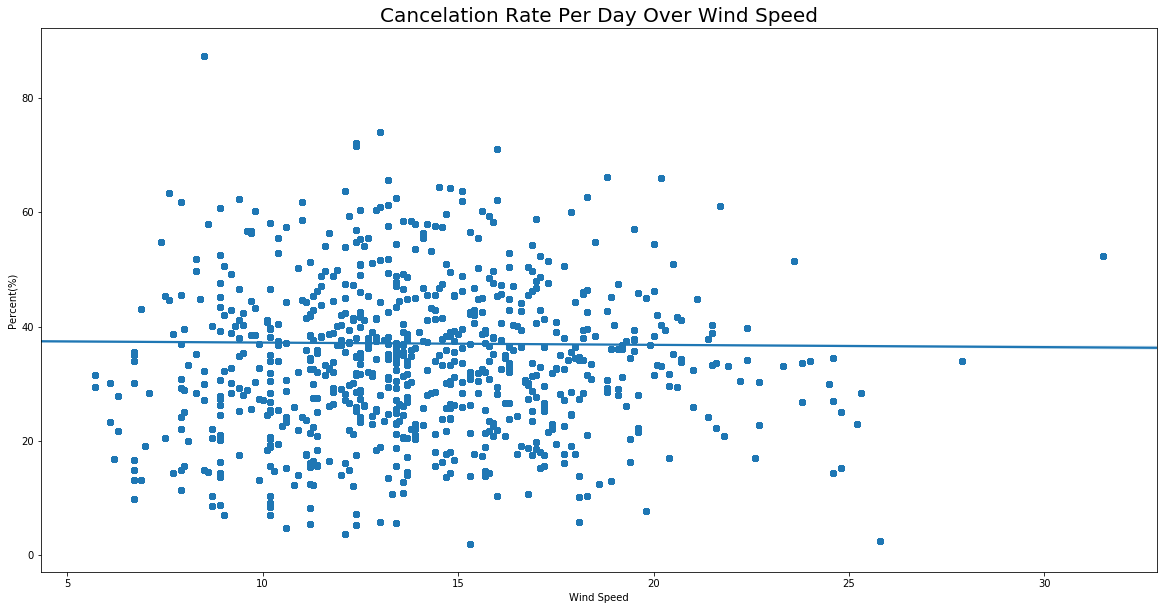

In [190]:
figure(figsize=(20,10))
windspeed=sns.scatterplot(x='Wind_Speed',y='percent',data=c).set_title('Cancelation Rate Per Day Over Wind Speed',fontsize=20)
sns.regplot(x='Wind_Speed',y='percent',data=c)
plt.ylabel('Percent(%)')
plt.xlabel('Wind Speed')
plt.show(windspeed)

In [101]:
previous_cancel=data.groupby(['previous_cancellations'])
previous_cancel.first()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,reservation_status_date,Date_time,Maximum_Temperature,Minimum _Temperature,Average_Temperature,Heat_Index,Precipitation(inches),Wind_Speed,Relative_Humidity,Conditions
previous_cancellations,,,,,,,,,,,,,,,,,,,,,
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,2015-07-01,2015-07-01,74.4,63.3,67.6,68.379723,0.1,14.4,83.56,"Rain, Clear"
1,47,City Hotel,1,257,2015,July,27,1,0,2,...,2015-06-16,2015-07-01,74.4,63.3,67.6,68.379723,0.1,14.4,83.56,"Rain, Clear"
2,192,City Hotel,1,258,2015,July,27,2,0,2,...,2015-01-01,2015-07-02,77.5,60.7,68.3,73.900927,0.0,13.2,69.33,Clear
3,6178,Resort Hotel,1,237,2015,August,35,27,2,6,...,2015-04-04,2015-08-27,79.1,66.3,71.8,71.492134,0.0,13.0,82.21,Clear
4,38470,City Hotel,0,0,2016,May,19,4,0,1,...,2016-05-05,2016-05-04,79.4,62.2,69.0,76.904736,0.0,16.3,52.56,Clear
5,67468,City Hotel,1,9,2016,October,43,19,0,1,...,2016-10-17,2016-10-19,75.4,64.6,68.2,72.846473,0.0,10.2,72.75,Clear
6,26931,City Hotel,1,113,2016,February,9,25,0,3,...,2015-12-18,2016-02-25,60.3,49.7,54.1,84.928216,0.0,11.8,75.78,Clear
11,20808,City Hotel,1,1,2015,December,52,24,0,1,...,2015-12-23,2015-12-24,55.0,47.0,50.8,72.500654,0.0,6.1,96.30,Clear
13,24971,City Hotel,0,65,2016,February,7,11,2,4,...,2016-02-17,2016-02-11,61.6,56.1,58.2,66.890579,0.5,15.3,90.49,"Rain, Clear"


In [132]:
cancel_count=previous_cancel['is_canceled'].value_counts().unstack()
cancel_count.fillna(0,inplace=True)
cancel_count['sum']=cancel_count[0]+cancel_count[1]
cancel_count['rate']=(cancel_count[1]/cancel_count['sum'])*100
cancel_count['category']=[0,1,2,3,4,5,6,11,13,14,19,21,24,25,26]
cancel_count

is_canceled,0,1,sum,rate,category
previous_cancellations,,,,,
0,74624.0,38282.0,112906.0,33.906081,0
1,337.0,5714.0,6051.0,94.430673,1
2,78.0,38.0,116.0,32.758621,2
3,45.0,20.0,65.0,30.769231,3
4,24.0,7.0,31.0,22.580645,4
5,17.0,2.0,19.0,10.526316,5
6,15.0,7.0,22.0,31.818182,6
11,25.0,10.0,35.0,28.571429,11
13,1.0,11.0,12.0,91.666667,13


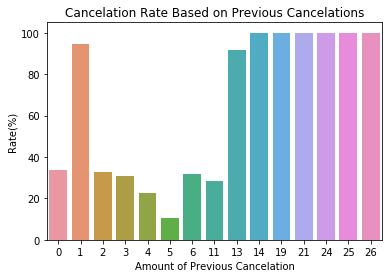

In [136]:
plot0=sns.barplot(data=cancel_count,x='category',y='rate')
plt.xlabel('Amount of Previous Cancelation')
plt.ylabel('Rate(%)')
plt.title('Cancelation Rate Based on Previous Cancelations')
plt.show(plot0)

In [138]:
d=data.groupby(['country']).count()
d['country']=d.index
d

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,Date_time,Maximum_Temperature,Minimum _Temperature,Average_Temperature,Heat_Index,Precipitation(inches),Wind_Speed,Relative_Humidity,Conditions,country
country,,,,,,,,,,,,,,,,,,,,,
ABW,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,ABW
AGO,362,362,362,362,362,362,362,362,362,362,...,362,362,362,362,362,362,362,362,362,AGO
AIA,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,AIA
ALB,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,ALB
AND,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,AND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VGB,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,VGB
VNM,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,VNM
ZAF,80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,ZAF


In [141]:
z=data.groupby('country')
z.first()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,reservation_status_date,Date_time,Maximum_Temperature,Minimum _Temperature,Average_Temperature,Heat_Index,Precipitation(inches),Wind_Speed,Relative_Humidity,Conditions
country,,,,,,,,,,,,,,,,,,,,,
ABW,48290,City Hotel,0,45,2016,June,27,27,1,3,...,2016-07-01,2016-06-27,90.6,66.8,77.8,88.900000,0.0,16.1,47.87,Clear
AGO,2930,City Hotel,0,2,2015,August,32,2,1,0,...,2015-08-03,2015-08-02,88.2,63.4,73.7,86.800000,0.0,12.0,54.90,Clear
AIA,49887,City Hotel,0,0,2016,July,28,8,2,2,...,2016-07-12,2016-07-08,88.3,63.8,74.1,85.100000,0.0,15.9,56.14,Clear
ALB,2059,Resort Hotel,0,28,2015,July,30,24,2,2,...,2015-07-28,2015-07-24,77.6,66.1,71.8,73.074003,0.0,16.9,76.33,Partially cloudy
AND,22821,City Hotel,1,10,2016,January,4,17,2,0,...,2016-01-08,2016-01-17,51.3,43.3,46.5,104.328227,0.1,8.9,75.82,"Rain, Clear"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VGB,54019,City Hotel,1,109,2016,August,32,5,1,2,...,2016-05-28,2016-08-05,85.4,64.8,73.3,84.000000,0.0,18.8,58.60,Clear
VNM,49782,Resort Hotel,0,21,2016,July,28,8,0,2,...,2016-07-10,2016-07-08,88.3,63.8,74.1,85.100000,0.0,15.9,56.14,Clear
ZAF,12735,Resort Hotel,0,31,2015,October,41,6,1,5,...,2015-10-12,2015-10-06,69.4,62.2,65.5,68.746441,0.1,13.7,82.40,"Rain, Clear"


In [167]:
country_count=z['is_canceled'].value_counts().unstack()
country_count.fillna(0,inplace=True)
country_count['sum']=country_count[0]+country_count[1]
country_count['rate']=(country_count[1]/country_count['sum'])*100
country_count['country']=country_count.index
country_count

is_canceled,0,1,sum,rate,country
country,,,,,
ABW,2.0,0.0,2.0,0.000000,ABW
AGO,157.0,205.0,362.0,56.629834,AGO
AIA,1.0,0.0,1.0,0.000000,AIA
ALB,10.0,2.0,12.0,16.666667,ALB
AND,2.0,5.0,7.0,71.428571,AND
...,...,...,...,...,...
VGB,0.0,1.0,1.0,100.000000,VGB
VNM,6.0,2.0,8.0,25.000000,VNM
ZAF,49.0,31.0,80.0,38.750000,ZAF


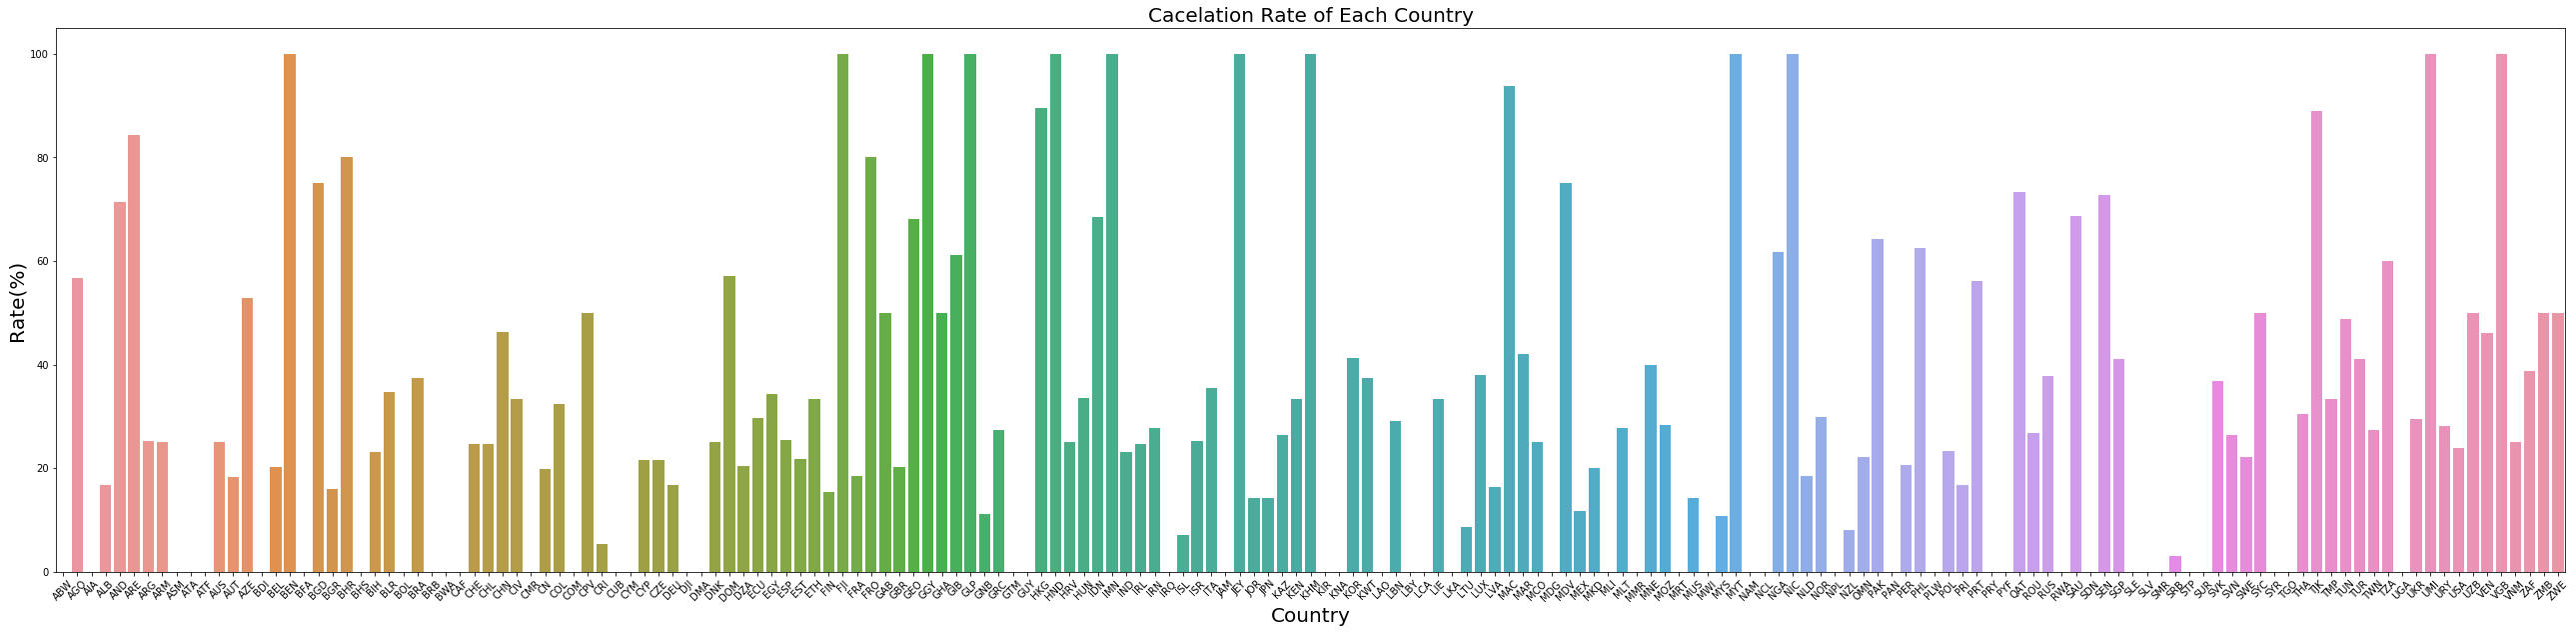

In [187]:
figure(figsize=(45,10))
plt.xticks(rotation=45)
plot9=sns.barplot(data=country_count,x='country',y='rate')
plt.xlabel('Country',fontsize=20)
plt.ylabel('Rate(%)',fontsize=20)
plt.title('Cacelation Rate of Each Country',fontsize=20)
plt.show(plot9)